In [24]:
# Because it"s 5 am
import plotly.io as pio
pio.templates.default = "plotly_dark"

## <b>Laboration - Covid-19</b>
---
### <b>Uppgift 1 - uppvärmning covid-19 data</b>


Datasets: [Covid-19 bekräftade fall](https://www.folkhalsomyndigheten.se/smittskydd-beredskap/utbrott/aktuella-utbrott/covid-19/statistik-och-analyser/bekraftade-fall-i-sverige/), 
[Statistik för vaccination mot covid-19](https://www.folkhalsomyndigheten.se/smittskydd-beredskap/utbrott/aktuella-utbrott/covid-19/statistik-och-analyser/statistik-over-registrerade-vaccinationer-covid-19/)

Börja med att manuellt läsa Excel-filerna och de olika bladen i varje dokument. Använd därefter Pandas för att läsa in bladet: "Veckodata Riket" i covid19-filen.

- a) Initial dataanalys. Använd metoder som ex. info(), describe(), value_counts(), head(), columns, index för att snabbt få en överblick.
- b) Slå ihop kolumnerna "år" och "veckonummer" till en kolumn med namn "Vecka".

För deluppgifterna c-f, använd både Seaborn och Plotly express. För Seaborn, använd subplots så du får 2x2 grid med graferna.
- c) Rita en linjediagram som visar avlidna fall per vecka från 2020v6 till nu.
- d) Rita en linjediagram som visar nya fall per vecka från 2020v6 till nu.
- e) Rita linjediagram av både avlidna fall per vecka och nya fall per vecka i samma fönster från 2020v6 till nu.
- f) Rita linjediagram av kumulativt antal fall från 2020v6 till nu.

###### Alla grafer ska exporteras till en undermapp som heter Visualiseringar i din mapp för labben. Exportera matplotlib/seaborngrafer i png-format och plotly-grafer som html-filer. Ge relevanta namn till dina filer så det blir lätt att referera till dem. Notera att du behöver ställa in bakgrundsfärg när du sparar matplotlibgrafer, annars blir de transparenta och svåra att läsa.


In [25]:
import pandas as pd # Create dataframe from xlsx
veckodata = pd.read_excel("Data/covid19.xlsx", sheet_name = "Veckodata Riket")

df = veckodata.astype({"år":"str", "veckonummer":"str"})    # Type conversion
df["Time"] = df["år"] + "v" + df["veckonummer"]             # Merge values in new column titled "Time"
veckodata["år"] = df["Time"].values                         # Replace column "år" with column "Time"
veckodata.rename(columns = {"år":"Vecka"}, inplace=True)    # Renamecolumn to "Vecka" (Week)
veckodata.drop(["veckonummer"], axis=1, inplace=True)       # Drop old columns

veckodata.tail() # Check results

,Vecka,Antal_fall_vecka,Antal_fall_100000inv_vecka,Antal_fall_100000inv_14dagar,Kum_antal_fall,Kum_fall_100000inv,Antal_nyaintensivvårdade_vecka,Kum_antal_intensivvårdade,Antal_avlidna_vecka,Antal_avlidna_milj_inv_vecka,Kum_antal_avlidna,Kum_antal_avlidna_milj_inv
138,2022v39,13532,130,175,2599038,25041,17,9510,94,9.1,20405,1965.900024
139,2022v40,3999,39,169,2603037,25079,20,9530,98,9.4,20503,1975.400024
140,2022v41,3408,33,72,2606445,25112,15,9545,94,9.1,20597,1984.400024
141,2022v42,3278,32,65,2609723,25144,20,9565,70,6.7,20667,1991.199951
142,2022v43,3502,34,66,2613225,25177,14,9579,37,3.6,20704,1994.699951


In [26]:
# Much shorter way to do this by @Rufshod
# df.insert(0, "Vecka", df["år"].astype(str) + "v" + df["veckonummer"].astype(str)) # and then drop

---

### Uppgift c)
Rita en linjediagram som visar avlidna fall per vecka från 2020v6 till nu.

In [27]:
import plotly_express as px # Lineplot for deceased / week
fig1c = px.line(data_frame=veckodata, x="Vecka", y="Antal_avlidna_vecka")

fig1c.show()

### Uppgift d)
Rita en linjediagram som visar nya fall per vecka från 2020v6 till nu.

In [28]:
# Lineplot for registered cases / week
fig1d = px.line(data_frame=veckodata, x="Vecka", y="Antal_fall_vecka")
fig1d.show()

### Uppgift f)
Rita linjediagram av kumulativt antal fall från 2020v6 till nu.

In [29]:
# Lineplot for total infection cases
fig1f = px.line(data_frame=veckodata, x="Vecka", y="Kum_antal_fall")
fig1f.show()

### Uppgift e)
- e) Rita linjediagram av både avlidna fall per vecka och nya fall per vecka i samma fönster från 2020v6 till nu.

In [30]:
from plotly.subplots import make_subplots

# Create figure with secondary y-axis
fig1e = make_subplots(specs=[[{"secondary_y": True}]])
fig1d.update_traces(yaxis="y2", line_color="#bc0028")
fig1e.add_traces(fig1c.data + fig1d.data)

# Title and naming
fig1e.layout.title = "Antal smittade och antal avlidna per vecka"
fig1e.layout.yaxis.title, fig1e.layout.yaxis2.title = "Avlidna", "Smittade"

fig1e.show()

---
Same figures rendered with Seaborn:

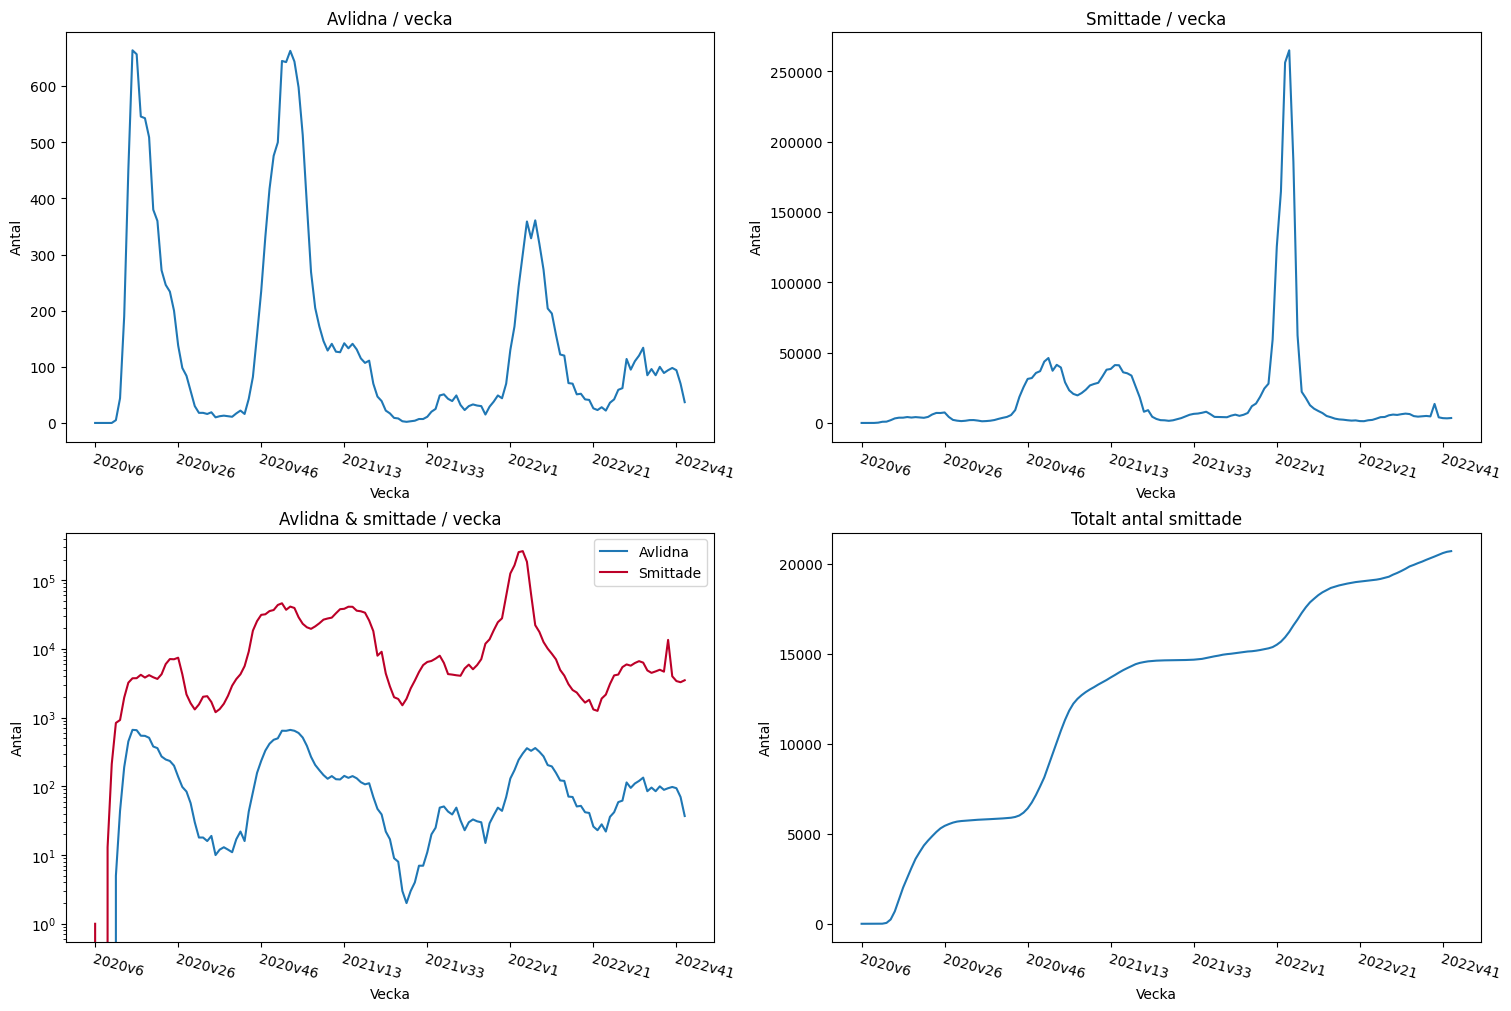

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

griffig, axes = plt.subplots(2,2, figsize = (15, 10), constrained_layout = False) # Create 2x2 grid

# Same figures, but with Seaborn:
sns.lineplot(veckodata, x = "Vecka", y = "Antal_avlidna_vecka", ax = axes[0,0])
sns.lineplot(veckodata, x = "Vecka", y = "Antal_fall_vecka", ax = axes[0,1])
sns.lineplot(veckodata, x = "Vecka", y = "Kum_antal_avlidna", ax = axes[1, 1])

# Combine both deceased and registered cases at [1,0]:
sns.lineplot(veckodata, x = "Vecka", y = "Antal_avlidna_vecka", ax = axes[1, 0], label = "Avlidna")
sns.lineplot(veckodata, x = "Vecka", y = "Antal_fall_vecka", ax = axes[1, 0], label = "Smittade", color = "#bc0028")

# Change scaling
axes[1, 0].set_yscale("log")

titles = ["Avlidna / vecka", "Smittade / vecka", "Avlidna & smittade / vecka", "Totalt antal smittade"]
y_lables = ["Antal"] * 4

# Formatting by @Andreas-Svensson
for ax, title, y_label in zip(axes.reshape(-1), titles, y_lables):
    ax.set_title(title)
    ax.set_ylabel(y_label)
    ax.xaxis.set_major_locator(plt.MaxNLocator(8))
    ax.xaxis.set_tick_params(rotation=-15) # draws ticks at bottom of x axis with rotation
    plt.setp(ax.get_xticklabels(), ha="left", rotation_mode="anchor") # anchor left part of label to tick

### <b>Uppgift 2 - uppvärmning vaccindata</b>
I uppgifterna nedan ska du använda dig av datasetet vaccin och bladet Vaccinerade kommun och ålder. Använd Plotly express för att rita diagrammen nedan för de uppgifter som kräver diagram. Använd Pandas för att svara på frågor om datasetet.

- a) Hur många län finns representerade i datasetet?
- b) Hur många kommuner finns representerade i datasetet?
- c) Hur stor är befolkningen som är representerad i datasetet?
- d) Beräkna hur många barn under 18 år det finns i Sverige baserat på det här datasetet. Du får leta upp statistik på hur stor totala befolkningen är i Sverige.
- e) Rita ett diagram som visar på åldersfördelningen av Sveriges befolkning.
- f) Rita stapeldiagram för andel med minst 1 dos per län, andel två doser per län och andel tre doser per län
- g) Tag Västra Götalands län och Stockholms län och rita diagram över andelen vaccinerade med minst 1 dos, två doser, tre doser och fyra doser.

In [32]:
vaccin = pd.read_excel("Data/vaccin.xlsx", sheet_name="Vaccinerade kommun och ålder") # Create dataframe from xlsx
vaccin.head(1) # Display column names

,Län,Län_namn,Kommun,Kommun_namn,Ålder,Befolkning,Antal minst 1 dos,Antal minst 2 doser,Antal 3 doser,Antal 4 doser,Andel minst 1 dos,Andel minst 2 doser,Andel 3 doser,Andel 4 doser
0,1,Stockholms län,114,Upplands Väsby,12-15,2422,1206,1046,NaN,NaN,0.497936,0.431874,NaN,NaN


### Uppgift abc)
- Hur många län finns representerade i datasetet?
- Hur många kommuner finns representerade i datasetet?
- Hur stor är befolkningen som är representerad i datasetet?

In [33]:
a2 = len(vaccin["Län_namn"].unique()) # Return unique values within "Län_namn"
b2 = len(vaccin["Kommun_namn"].unique()) # Return unique values within "Kommun_namn"
c2 = vaccin["Befolkning"].sum() # Sum of "Befolkning"

print(f"Det finns {a2} län och {b2} kommuner. Befolkningsmängden är {c2}.")

Det finns 21 län och 290 kommuner. Befolkningsmängden är 9092790.


### Uppgift d) TODO ⚠️
Beräkna hur många barn under 18 år det finns i Sverige baserat på det här datasetet. Du får leta upp statistik på hur stor totala befolkningen är i Sverige.


In [34]:
vaccin["Ålder"][0:3]

0    12-15
1    16-17
2    18-29
Name: Ålder, dtype: object

In [35]:
vaccin["Befolkning"]

0       2422
1       1203
2       6692
3       7332
4       6946
        ... 
2895    3079
2896    2781
2897    2194
2898    1280
2899     219
Name: Befolkning, Length: 2900, dtype: int64

### Uppgift e)
Rita ett diagram som visar på åldersfördelningen av Sveriges befolkning.

In [36]:
# Pie chart with Plotly Express
fig2e_pie = px.pie(data_frame=vaccin, values="Befolkning", names="Ålder")

fig2e_pie.show()

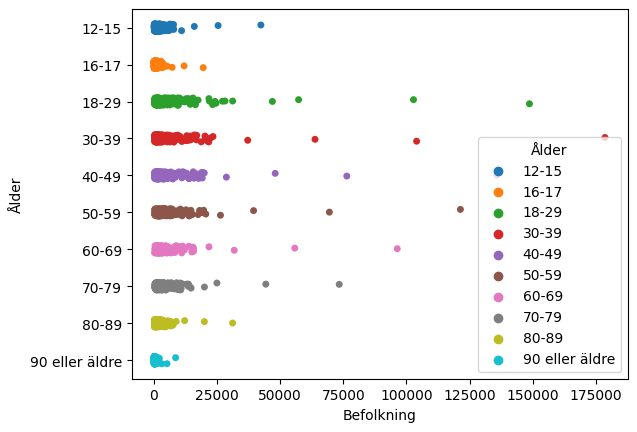

In [42]:
# Single-axis scatter plot (stripplot) with seaborn

fig2e_strip = sns.stripplot(data=vaccin, x="Befolkning", y="Ålder", hue="Ålder")

 
 ### Uppgift f)
 Rita stapeldiagram för andel med minst 1 dos per län, andel två doser per län och andel tre doser per län

In [51]:
befolk, doser = vaccin.groupby("Län_namn")["Befolkning"].sum(), vaccin.groupby("Län_namn")

# Group province population sum with name of province
dos1 = doser["Antal minst 1 dos"].sum() / befolk
dos2 = doser["Antal minst 2 doser"].sum() / befolk
dos3 = doser["Antal 3 doser"].sum() / befolk

# Function by @Danneftw1
def plotly_bar_plot_with_labels_sublabels (x, y, title, labels, sublabels, file_name_save):
    fig2f = px.bar(
        x=x,
        y=y,
        barmode= 'group', # group bars horizontally
        labels=labels,
        title=title
    )

    newnames = sublabels
    # To be able to change the sub titles for 'Antal doser' without changing the data source,
    # you can switch the legendgroups name with a dict and map it onto existing subtitle names.
    # I had to do this since I couldn't change it through 'labels=' like the other titles
    # source: https://stackoverflow.com/questions/64371174/plotly-how-to-change-variable-label-names-for-the-legend-in-a-plotly-express-li
    fig2f.for_each_trace(lambda t: t.update(name=newnames[t.name]))

    # angles the provinces in order the read more easily
    fig2f.update_xaxes(tickangle=40)
    fig2f.show()

labels_ = {"value": "Befolkning",
            "variable": "Vaccin:",
            "x": "Län",}

newnames = {"wide_variable_0": "Dos 1",
            "wide_variable_1": "Dos 2",
            "wide_variable_2": "Dos 3",}

plotly_bar_plot_with_labels_sublabels(vaccin.Län_namn.unique(), [dos1, dos2, dos3],"Andel vaccinerade per län", labels_, newnames, "Andel_vaccinerade_per_lä234n")


### Uppgift g)
Tag Västra Götalands län och Stockholms län och rita diagram över andelen vaccinerade med minst 1 dos, två doser, tre doser och fyra doser.

In [52]:
# Received help from Håkan in order to group both provinces together to create 4 variables instead of 8
västra_göta_stockh = vaccin[(vaccin["Län_namn"] == "Västra Götalands län") | (vaccin["Län_namn"] == "Stockholms län")]
västra_göta_stockh_group = västra_göta_stockh.groupby("Län")

# works same as exercise above after grouping
andel_dos1 = västra_göta_stockh_group["Antal minst 1 dos"].sum() / västra_göta_stockh_group["Befolkning"].sum()
andel_dos2 = västra_göta_stockh_group["Antal minst 2 doser"].sum() / västra_göta_stockh_group["Befolkning"].sum()
andel_dos3 = västra_göta_stockh_group["Antal 3 doser"].sum() / västra_göta_stockh_group["Befolkning"].sum()
andel_dos4 = västra_göta_stockh_group["Antal 4 doser"].sum() / västra_göta_stockh_group["Befolkning"].sum()

labels_dos ={
            "value": "Befolkning",
            "variable": "Antal doser",
            "x": "Sveriges Län",},

sub_labels = {
            "wide_variable_0": "Dos 1",
            "wide_variable_1": "Dos 2",
            "wide_variable_2": "Dos 3",
            "wide_variable_3": "Dos 4"}

plotly_bar_plot_with_labels_sublabels( 
    västra_göta_stockh.Län_namn.unique(),
    [andel_dos1, andel_dos2, andel_dos3, andel_dos4], 
    "Antal vaccinerade / län", 
    labels_dos, sub_labels, 
    "Andel_vaccinerade_vg_sthl.html")

---

### Uppgift 3 - KPIer & explorativ dataanalys
Definiera 3-6 KPIer utöver de som använts i ovanstående uppgifter och gör explorativ dataanalys på flera sheets på båda Excel-filerna. Se till att dokumentera vad du undersöker med markdown kombinerad med kod i Jupyter notebook eller om du använder Pythonskript, skriv en markdown vid sidan om. Dokumentera också vad du kommer fram till och spara alla visualiseringar.

In [38]:
covid_swe = pd.read_excel("Data/covid19.xlsx", sheet_name=None)
vaccine_swe = pd.read_excel("Data/vaccin.xlsx")

covid_swe

{'Antal per dag region':      Statistikdatum  Totalt_antal_fall  Blekinge  Dalarna  Gotland  Gävleborg  \
 0        2020-02-04                  1         0        0        0          0   
 1        2020-02-05                  0         0        0        0          0   
 2        2020-02-06                  0         0        0        0          0   
 3        2020-02-07                  0         0        0        0          0   
 4        2020-02-08                  0         0        0        0          0   
 ...             ...                ...       ...      ...      ...        ...   
 998      2022-10-29                340         2       18        1          0   
 999      2022-10-30                194         2       18        0          3   
 1000     2022-10-31                468         5       11        0          7   
 1001     2022-11-01                697         3       44        1          8   
 1002     2022-11-02                607        11       41        0       